In [4]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving DSP 461 Project.csv to DSP 461 Project (1).csv


In [6]:
df = pd.read_csv("DSP 461 Project.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [7]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [8]:
df.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [9]:
dropout = df[df['Target']=='Dropout']
graduate = df[df['Target']=='Graduate']
enrolled = df[df['Target']=='Enrolled']

print(len(dropout), "Dropouts")
print(len(graduate), "Graduates")
print(len(enrolled), "Enrolled")

num_drop = len(dropout)
num_grad = len(graduate)
num_enroll = len(enrolled)

1421 Dropouts
2209 Graduates
794 Enrolled


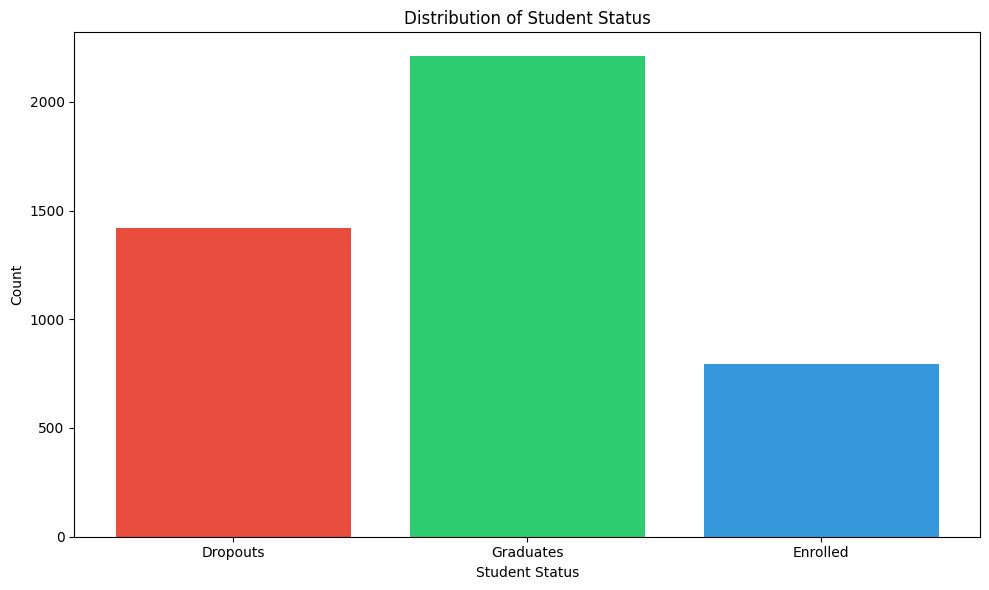

In [10]:
import matplotlib.pyplot as plt
categories = ['Dropouts', 'Graduates', 'Enrolled']
values = [num_drop, num_grad, num_enroll]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['#e74c3c', '#2ecc71', '#3498db'])
plt.xlabel('Student Status')
plt.ylabel('Count')
plt.title('Distribution of Student Status')

# Add value labels on top of bars
#for i, v in enumerate(values):
#    plt.text(i, v + 50, str(v), ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
df['Curricular units 2nd sem (approved)'].max()
print(dropout['Curricular units 2nd sem (approved)'].mean())
print(graduate['Curricular units 2nd sem (approved)'].mean())
print(enrolled['Curricular units 2nd sem (approved)'].mean())

1.94018296973962
6.177003168854686
4.057934508816121


In [12]:
correlation_df = df.copy()
correlation_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [13]:
df['Target_Dropout'] = (df['Target'] == 'Dropout').astype(int)

print("Target_Dropout column created:")
print(df['Target_Dropout'].head())
print(f"\nData type: {df['Target_Dropout'].dtype}")

print(f"\nTarget_Dropout in columns: {'Target_Dropout' in df.columns}")

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nNumerical columns found: {len(numerical_cols)}")
print(f"Target_Dropout in numerical_cols: {'Target_Dropout' in numerical_cols}")

if 'Target_Dropout' not in numerical_cols:
    print("\nTarget_Dropout not detected as numerical. Converting explicitly...")
    df['Target_Dropout'] = df['Target_Dropout'].astype('int64')
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

correlations = df[numerical_cols].corr()['Target_Dropout'].sort_values(ascending=False)

print("\nCorrelations with Dropout:")
print(correlations)

Target_Dropout column created:
0    1
1    0
2    1
3    0
4    0
Name: Target_Dropout, dtype: int64

Data type: int64

Target_Dropout in columns: True

Numerical columns found: 37
Target_Dropout in numerical_cols: True

Correlations with Dropout:
Target_Dropout                                    1.000000
Age at enrollment                                 0.254215
Debtor                                            0.229407
Gender                                            0.203983
Application mode                                  0.198458
Marital status                                    0.093712
Curricular units 2nd sem (without evaluations)    0.079901
Mother's qualification                            0.064958
Curricular units 1st sem (without evaluations)    0.054230
Previous qualification                            0.049379
Inflation rate                                    0.027826
Father's qualification                            0.018295
Unemployment rate                           

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-3209481646.py:21: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


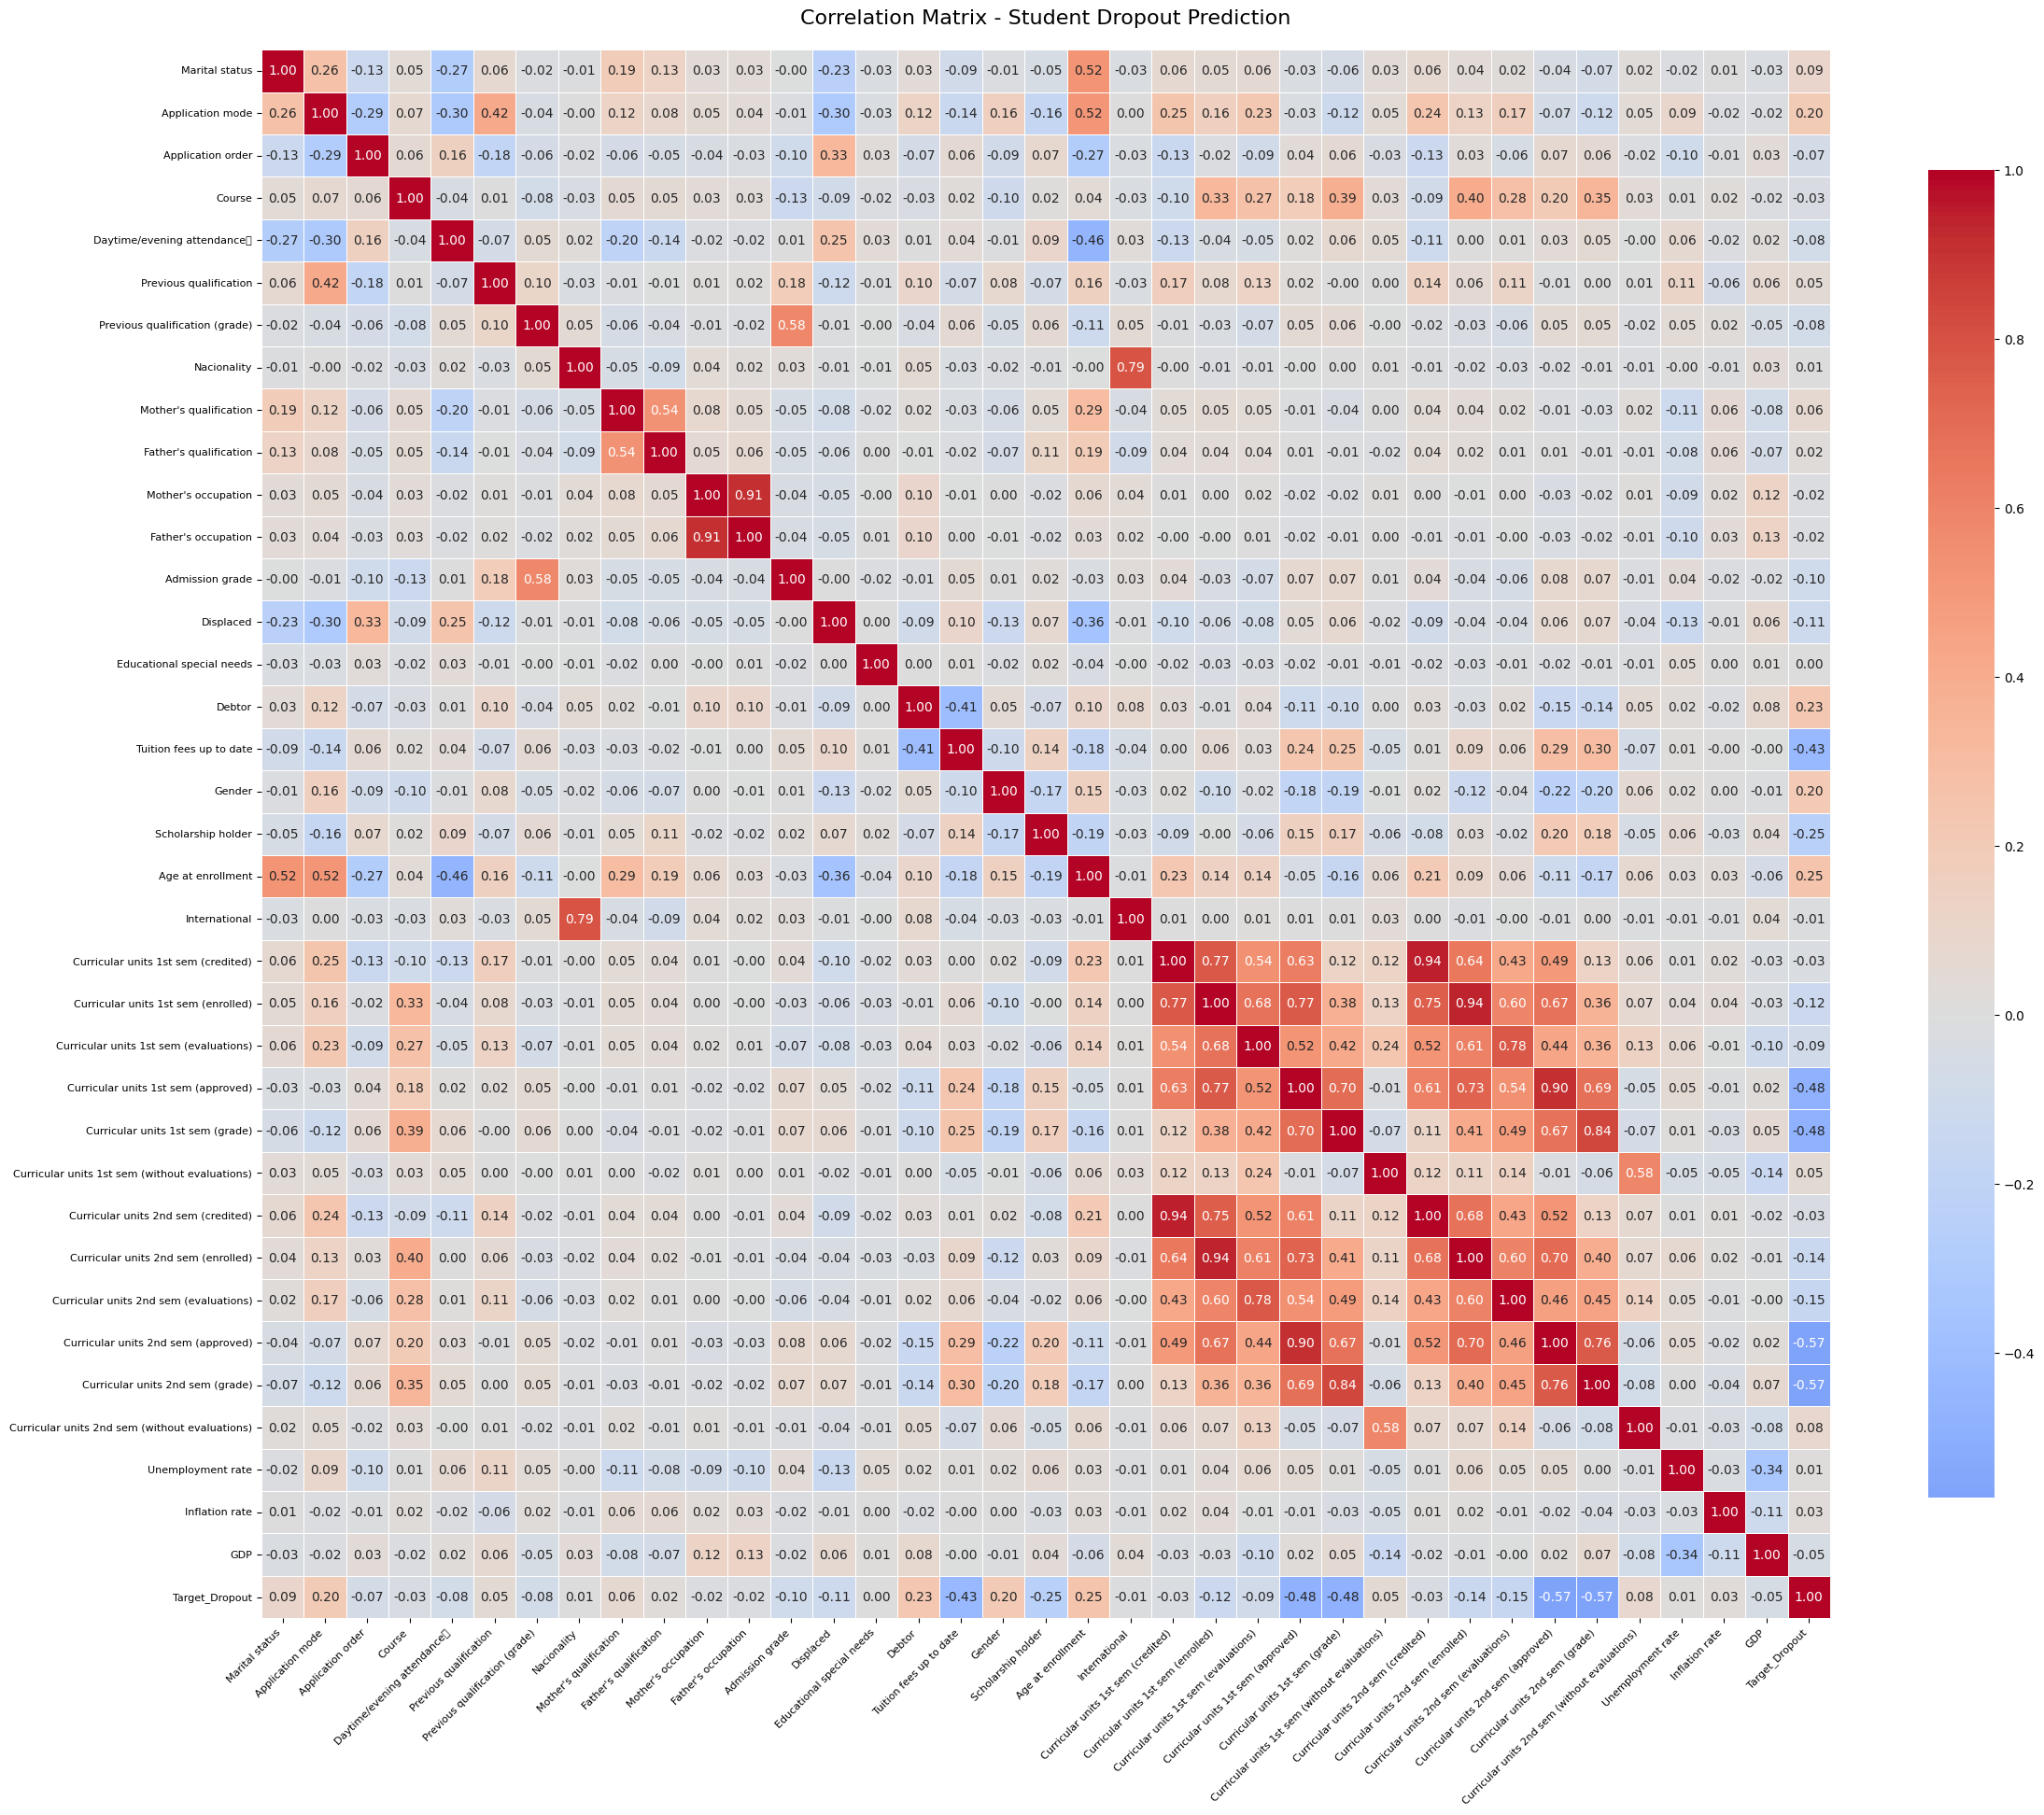

/tmp/ipython-input-3209481646.py:35: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


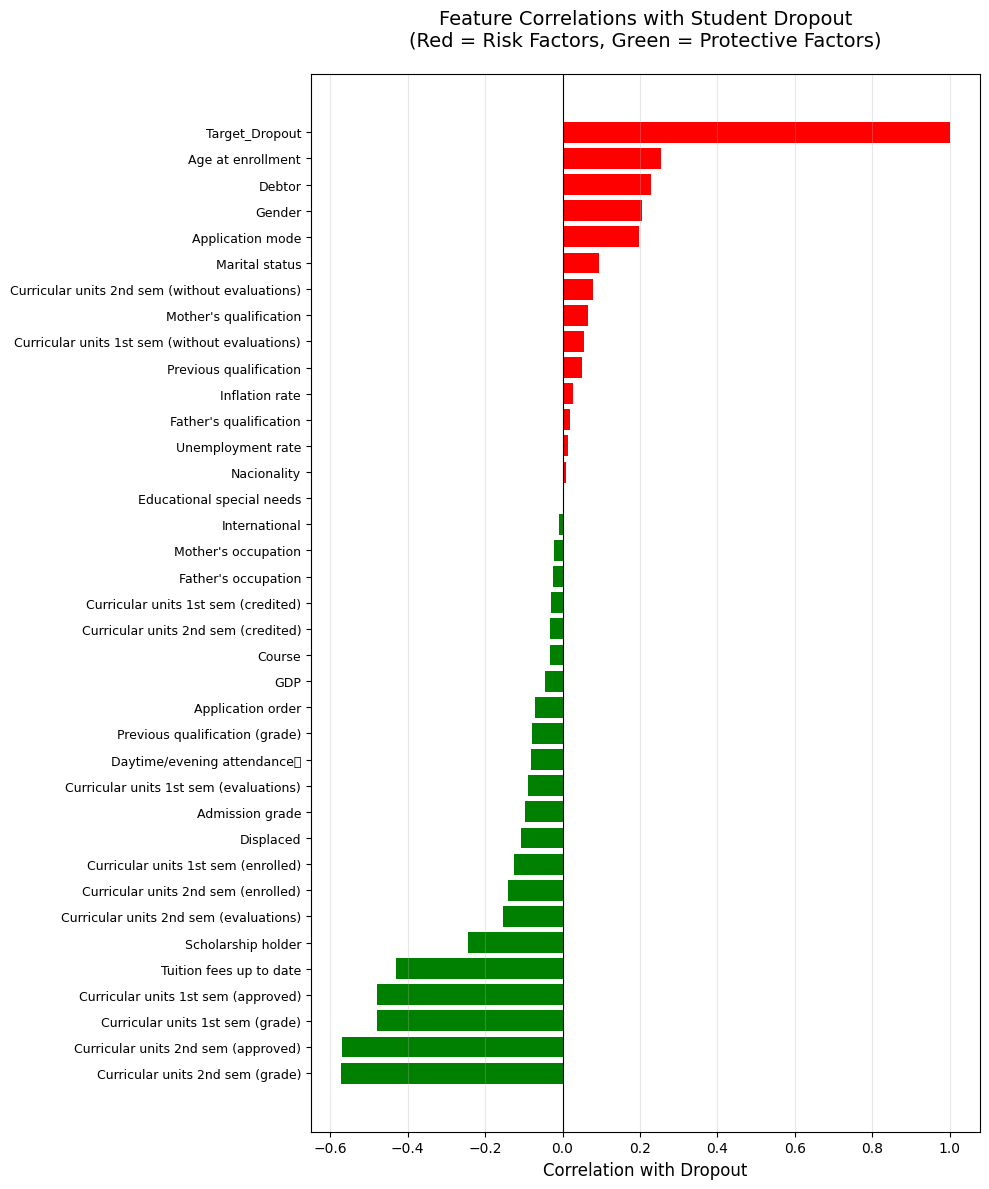

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(24, 20))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix - Student Dropout Prediction', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

correlations = corr_matrix['Target_Dropout'].sort_values(ascending=True)

plt.figure(figsize=(10, 12))
colors = ['red' if x > 0 else 'green' for x in correlations]
plt.barh(range(len(correlations)), correlations, color=colors)
plt.yticks(range(len(correlations)), correlations.index, fontsize=9)
plt.xlabel('Correlation with Dropout', fontsize=12)
plt.title('Feature Correlations with Student Dropout\n(Red = Risk Factors, Green = Protective Factors)',
          fontsize=14, pad=20)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
df.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [16]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [17]:
df.Target_Dropout.unique()

array([1, 0])

In [18]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,0


In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
import pandas as pd
import numpy as np

selected_features = [
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (approved)',
    'Tuition fees up to date',
    'Scholarship holder',
    'Debtor',
    'Age at enrollment'
]

X = pd.get_dummies(df[selected_features], drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

confusion = pd.crosstab(df['Target_Dropout'], df['Cluster']).values
row_ind, col_ind = linear_sum_assignment(-confusion)
label_map = dict(zip(col_ind, row_ind))  # e.g., {0: 1, 1: 0}
df['Predicted_Label'] = df['Cluster'].map(label_map)

accuracy = accuracy_score(df['Target_Dropout'], df['Predicted_Label'])
print(f"KMeans Binary Dropout Accuracy: {accuracy:.4f}")


KMeans Binary Dropout Accuracy: 0.8151


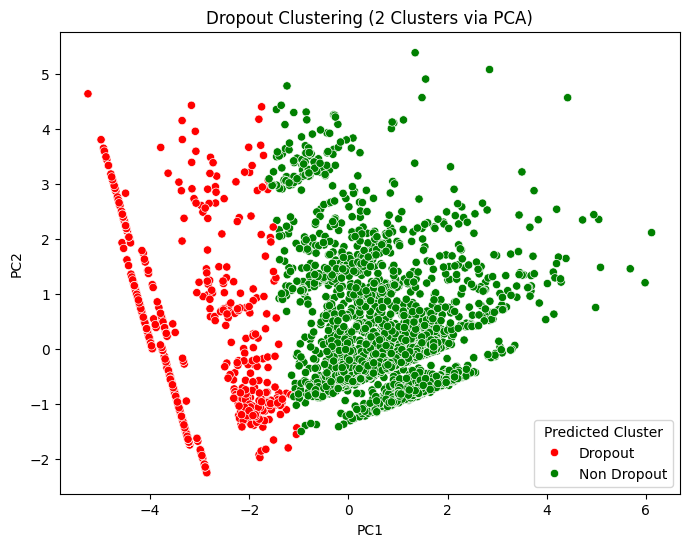

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = X_pca[:, 0], X_pca[:, 1]

df['Dropout_Status'] = df['Predicted_Label'].map({1: 'Dropout', 0: 'Non Dropout'})

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Dropout_Status", palette={"Dropout": "red", "Non Dropout": "green"})
plt.title("Dropout Clustering (2 Clusters via PCA)")
plt.legend(title="Predicted Cluster")
plt.show()



In [21]:
confusion

array([[2840,  163],
       [ 655,  766]])

In [22]:
enrolled_df = df[df['Target'] == 'Enrolled']

cluster_counts = enrolled_df['Cluster'].value_counts().rename(index={0: 'Cluster 0', 1: 'Cluster 1'})
print("Raw KMeans Cluster Assignments Among Enrolled Students:")
print(cluster_counts)

label_counts = enrolled_df['Predicted_Label'].map({1: 'Dropout', 0: 'Not Dropout'}).value_counts()
print("\nMapped Labels Among Enrolled Students (After Cluster-to-Label Mapping):")
print(label_counts)

misclustered = enrolled_df[enrolled_df['Predicted_Label'] == 1]
print(f"\nEnrolled students misclustered as Dropout: {len(misclustered)}")


Raw KMeans Cluster Assignments Among Enrolled Students:
Cluster
Cluster 0    708
Cluster 1     86
Name: count, dtype: int64

Mapped Labels Among Enrolled Students (After Cluster-to-Label Mapping):
Predicted_Label
Not Dropout    708
Dropout         86
Name: count, dtype: int64

Enrolled students misclustered as Dropout: 86


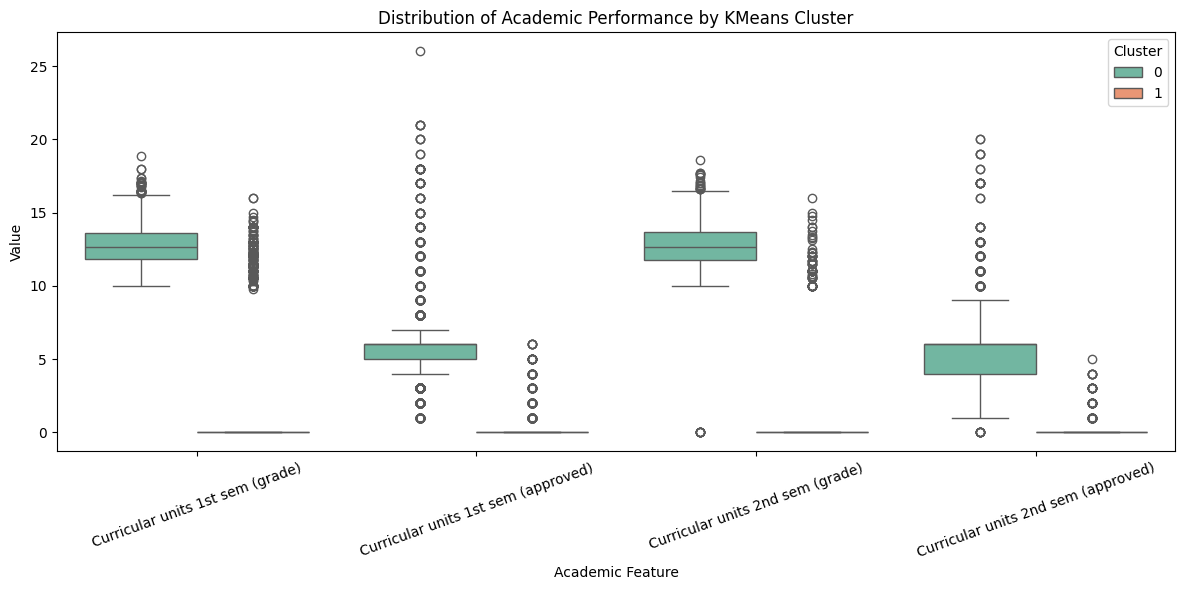

In [23]:
academic_features = [
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (approved)'
]

df_melted = df.melt(id_vars='Cluster',
                    value_vars=academic_features,
                    var_name='Academic Feature',
                    value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Academic Feature', y='Value', hue='Cluster', palette='Set2')
plt.title("Distribution of Academic Performance by KMeans Cluster")
plt.xticks(rotation=20)
plt.xlabel("Academic Feature")
plt.ylabel("Value")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


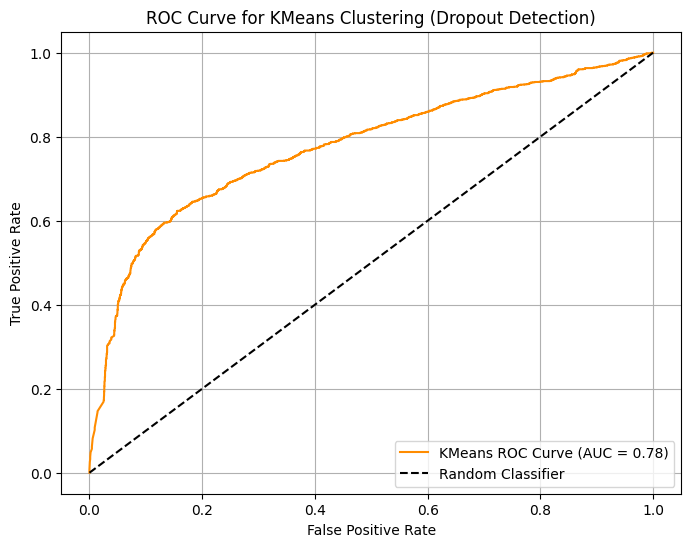

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
distances = kmeans.transform(X_scaled)


dropout_cluster_id = [k for k, v in label_map.items() if v == 1][0]
scores = -distances[:, dropout_cluster_id]
true_labels = df['Target_Dropout']
fpr, tpr, thresholds = roc_curve(true_labels, scores)
roc_auc = roc_auc_score(true_labels, scores)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'KMeans ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KMeans Clustering (Dropout Detection)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
